In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

In [2]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [3]:
data_train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [4]:
data_test.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [34]:
data_train.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [36]:
data_test.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [7]:
data_train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [37]:
data_test.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,89861.000000,89861.000000,89861.000000,89861.0,89861.000000,89861.000000,89861.0,89861.000000
mean,1148.178164,7.263529,1.286732,0.0,13.031048,15.190636,0.0,0.282280
std,4611.480867,554.965869,0.920910,0.0,18.692751,12.677904,0.0,0.450112
min,0.000000,0.020000,0.000000,0.0,0.000000,-0.500000,0.0,0.000000
25%,446.000000,1.950000,1.000000,0.0,0.000000,6.000000,0.0,0.000000
50%,705.000000,3.200000,1.000000,0.0,9.000000,9.750000,0.0,0.000000
75%,1094.000000,5.730000,1.000000,0.0,20.000000,26.450000,0.0,1.000000
max,86395.000000,145517.600000,9.000000,0.0,719.000000,431.500000,0.0,1.000000


<AxesSubplot:>

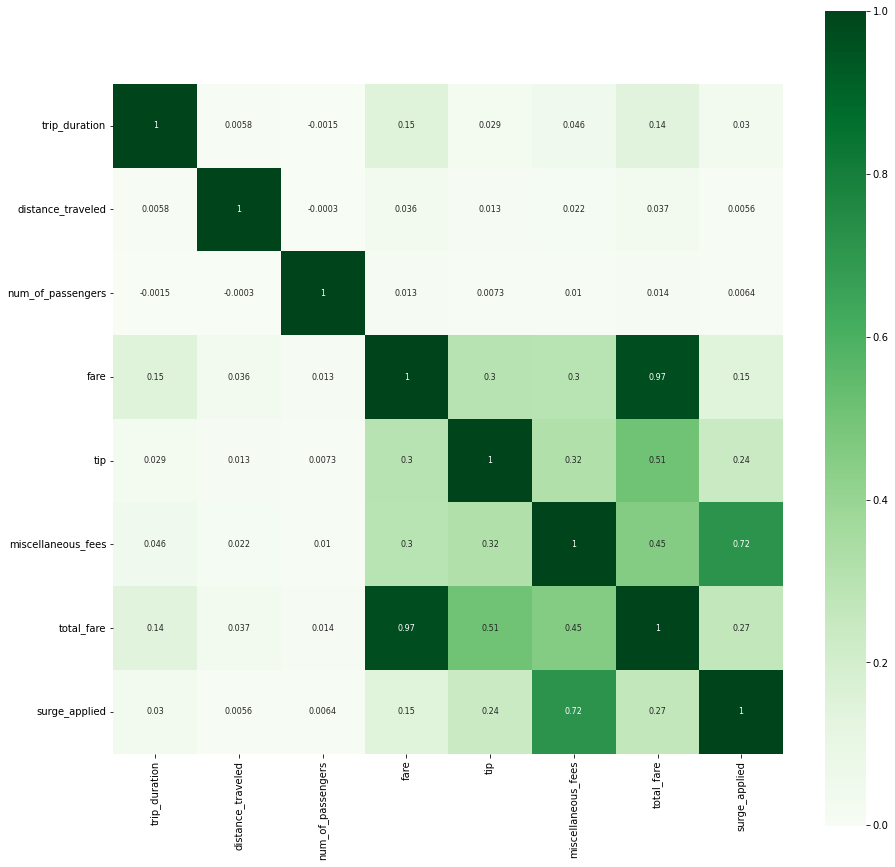

In [8]:
f = data_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(f,cmap='Greens',cbar=True,square=True,annot_kws={'size':8},annot=True)

<AxesSubplot:>

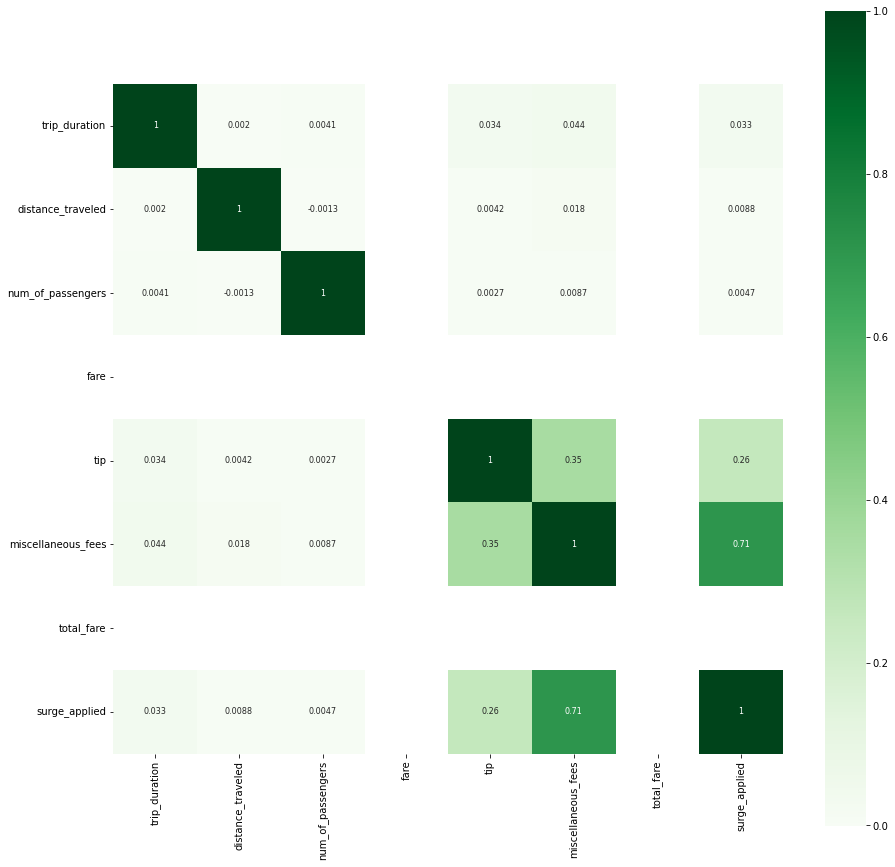

In [38]:
f = data_test.corr()
plt.figure(figsize=(15,15))
sns.heatmap(f,cmap='Greens',cbar=True,square=True,annot_kws={'size':8},annot=True)

<AxesSubplot:xlabel='num_of_passengers', ylabel='total_fare'>

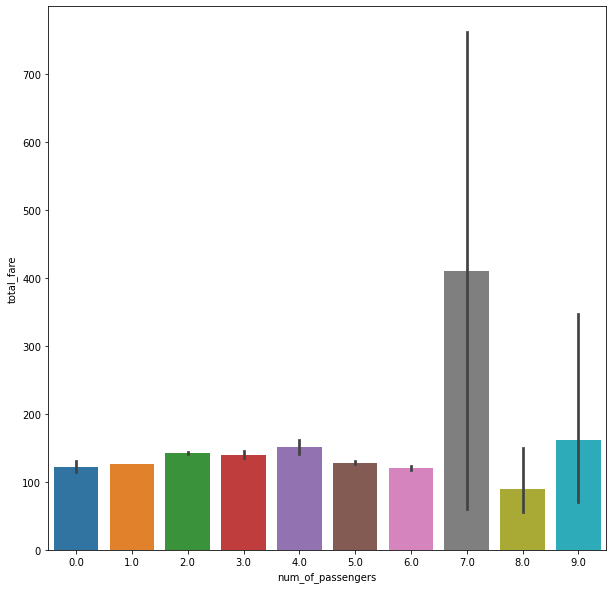

In [9]:
plt.figure(figsize=(10,10))
sns.barplot(data=data_train, y='total_fare', x='num_of_passengers')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_passengers', ylabel='count'>

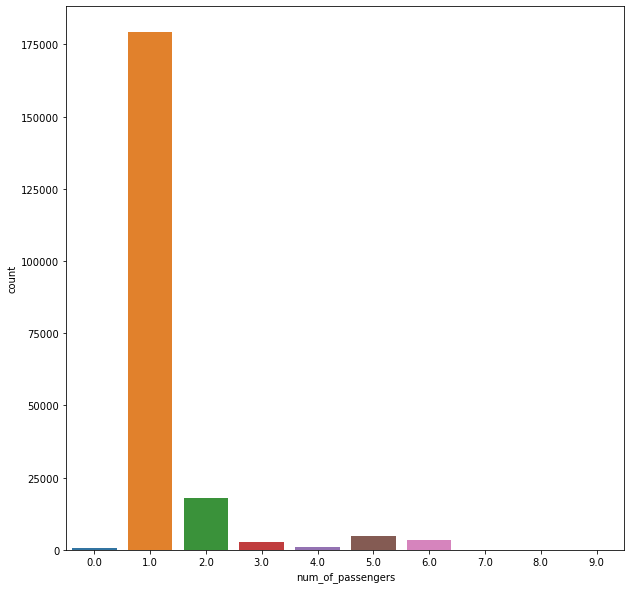

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(data_train['num_of_passengers'])

In [11]:
xtr = data_train.drop(['total_fare'], axis=1)
ytr = data_train['total_fare']

In [14]:
# splitting the data into test and train datasets
xtr_train,xtr_test, ytr_train,ytr_test = train_test_split(xtr,ytr,random_state=1)

In [17]:
# Training the model
lreg = LinearRegression()
ridge = Ridge()
lasso= Lasso()

In [18]:
lreg.fit(xtr_train,ytr_train)

LinearRegression()

In [19]:
ridge.fit(xtr_train,ytr_train)

Ridge()

In [20]:
lasso.fit(xtr_train,ytr_train)

Lasso()

In [22]:
# Model Evaluation Linear Regression
prediction = lreg.predict(xtr_train)
r2_score = metrics.r2_score(prediction, ytr_train) 
mae = metrics.mean_absolute_error(prediction, ytr_train)
mse = metrics.mean_squared_error(prediction, ytr_train) 
mape = metrics.mean_absolute_percentage_error(prediction, ytr_train) 

In [25]:
print("Linear Regression training data")
print(f"R2_score = {r2_score}")
print(f"mean absolute error = {mae}")
print(f"mean square error = {mse}")
print(f'mean absolte percentage error = {mape}')      

Linear Regression training data
R2_score = 1.0
mean absolute error = 1.6074515604274978e-13
mean square error = 7.58221497400098e-26
mean absolte percentage error = 0.0006359138718266329


In [26]:
# Model Evaluation Linear Regression
prediction2 = lreg.predict(xtr_test)
r2_score = metrics.r2_score(prediction2, ytr_test) 
mae = metrics.mean_absolute_error(prediction2, ytr_test)
mse = metrics.mean_squared_error(prediction2, ytr_test) 
mape = metrics.mean_absolute_percentage_error(prediction2, ytr_test)
print("Linear Regression test data")
print(f"R2_score = {r2_score}")
print(f"mean absolute error = {mae}")
print(f"mean square error = {mse}")
print(f'mean absolte percentage error = {mape}')    

Linear Regression test data
R2_score = 1.0
mean absolute error = 1.6066512180003017e-13
mean square error = 8.051508836183914e-26
mean absolte percentage error = 0.0005532345142043096


In [28]:
x = data_train.drop(['total_fare'], axis=1)
y = data_train['total_fare']
xt = data_test

In [29]:
# Training the model
Lreg = LinearRegression()
Ridge = Ridge()
Lasso= Lasso()
Lreg.fit(x,y)


LinearRegression()

In [30]:
Ridge.fit(x,y)

Ridge()

In [31]:
Lasso.fit(x,y)

Lasso()

In [32]:
# Model Evaluation Linear Regression
prediction = Lreg.predict(x)
r2_score = metrics.r2_score(prediction, y) 
mae = metrics.mean_absolute_error(prediction, y)
mse = metrics.mean_squared_error(prediction, y) 
mape = metrics.mean_absolute_percentage_error(prediction, y) 

In [33]:
print("Linear Regression test data")
print(f"R2_score = {r2_score}")
print(f"mean absolute error = {mae}")
print(f"mean square error = {mse}")
print(f'mean absolte percentage error = {mape}')    

Linear Regression test data
R2_score = 1.0
mean absolute error = 6.883930710794886e-13
mean square error = 1.467572008972464e-24
mean absolte percentage error = 0.0006152437366823271


In [42]:
# Model Evaluation Ridge
prediction = ridge.predict(xtr_train)
r2_score = metrics.r2_score(prediction, ytr_train) 
mae = metrics.mean_absolute_error(prediction, ytr_train)
mse = metrics.mean_squared_error(prediction, ytr_train) 
mape = metrics.mean_absolute_percentage_error(prediction, ytr_train) 
print("Ridge Regression train data")
print(f"R2_score = {r2_score}")
print(f"mean absolute error = {mae}")
print(f"mean square error = {mse}")
print(f'mean absolute percentage error = {mape}')    

Ridge Regression train data
R2_score = 0.9999999999999999
mean absolute error = 3.8822597604414544e-07
mean square error = 5.8096179085485e-13
mean absolute percentage error = 0.0006359171239687413


In [43]:
# Model Evaluation Linear Regression
prediction2 = ridge.predict(xtr_test)
r2_score = metrics.r2_score(prediction2, ytr_test) 
mae = metrics.mean_absolute_error(prediction2, ytr_test)
mse = metrics.mean_squared_error(prediction2, ytr_test) 
mape = metrics.mean_absolute_percentage_error(prediction2, ytr_test)
print("Ridge Regression test data")
print(f"R2_score = {r2_score}")
print(f"mean absolute error = {mae}")
print(f"mean square error = {mse}")
print(f'mean absolte percentage error = {mape}')    

Ridge Regression test data
R2_score = 1.0
mean absolute error = 3.864775476332199e-07
mean square error = 5.662384859414546e-13
mean absolte percentage error = 0.000553237792059605
